In [26]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt

# Data processing, modeling, and model evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Randomization
import random

In [27]:
# Load and check data

dataframeA = pd.read_csv('5. Dataset Feature Dropping/MeterA_featureSelection.csv')
#display(dataframeA.head())
dataframeA.head()

dataframeA = dataframeA.drop('Unnamed: 0', axis=1)

featuresVector = dataframeA[['Flatness ratio','Symmetry','Crossflow','Average speed of sound','Average Gain']]

# yLbl is Class Attruibute labels

yLbl = dataframeA[['Class Attruibute']]

#featuresVector
dataframeA

,Flatness ratio,Symmetry,Crossflow,Average speed of sound,Average Gain,Class Attruibute
0,1.000000,0.408325,0.028575,-0.097028,0.387698,-0.544890
1,0.408325,1.000000,0.391777,-0.521473,-0.274037,-0.236005
2,0.028575,0.391777,1.000000,-0.474339,-0.610221,0.162365
3,-0.097028,-0.521473,-0.474339,1.000000,0.567345,0.139247
4,0.387698,-0.274037,-0.610221,0.567345,1.000000,-0.137049
5,-0.544890,-0.236005,0.162365,0.139247,-0.137049,1.000000


In [28]:
dataframeA['Class Attruibute'].value_counts()

-0.544890    1
-0.236005    1
 0.162365    1
 0.139247    1
-0.137049    1
 1.000000    1
Name: Class Attruibute, dtype: int64

In [29]:
dataframeA.shape

(6, 6)

In [30]:
dataframeA['Class Attruibute'].value_counts()

-0.544890    1
-0.236005    1
 0.162365    1
 0.139247    1
-0.137049    1
 1.000000    1
Name: Class Attruibute, dtype: int64

In [31]:
# the scaler object (model)
scaler = StandardScaler()

# fit and transform the data
scaled_data = scaler.fit_transform(featuresVector) 
scaled_data1 = scaler.fit_transform(dataframeA)

#print(dataframeA)
print("------------------------------  scaled data  -----------------------------")
print(scaled_data)

#print("-----------------------------------------------------------")
#print(scaled_data[:6])

------------------------------  scaled data  -----------------------------
[[ 1.66746974  0.53855124 -0.1012108  -0.36544952  0.42452117]
 [ 0.43865363  1.67565429  0.57388449 -1.1436628  -0.7859493 ]
 [-0.35002839  0.50674868  1.7044069  -1.05724214 -1.40090978]
 [-0.61088516 -1.24837012 -1.03599099  1.64593165  0.7531372 ]
 [ 0.39581502 -0.7728373  -1.28855944  0.85266589  1.54456636]
 [-1.54102484 -0.6997468   0.14746984  0.06775692 -0.53536564]]


In [32]:
print("-------------------------with class attribute----------------------------------")
print(scaled_data1)

-------------------------with class attribute----------------------------------
[[ 1.66746974  0.53855124 -0.1012108  -0.36544952  0.42452117 -1.2637501 ]
 [ 0.43865363  1.67565429  0.57388449 -1.1436628  -0.7859493  -0.62260202]
 [-0.35002839  0.50674868  1.7044069  -1.05724214 -1.40090978  0.20429008]
 [-0.61088516 -1.24837012 -1.03599099  1.64593165  0.7531372   0.15630456]
 [ 0.39581502 -0.7728373  -1.28855944  0.85266589  1.54456636 -0.41719942]
 [-1.54102484 -0.6997468   0.14746984  0.06775692 -0.53536564  1.9429569 ]]


In [33]:
pca = PCA(n_components=3)

pca_features = pca.fit_transform(scaled_data)
 
print('Shape before PCA: ', scaled_data.shape)
print('Shape after PCA: ', pca_features.shape)
 
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2', 'PC3'])

finalDf = pd.concat([pca_df, dataframeA['Class Attruibute']], axis = 1)

#principalComponents = pca3.fit_transform(featuresVector)

#principalComponentsTest = pca3.fit_transform(scaled_data)

#principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

#principalDfTest = pd.DataFrame(data = principalComponentsTest, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

#finalDf = pd.concat([principalDf, dataframeA['Class Attruibute']], axis = 1)
#finalDf.head()

#finalDfTest = pd.concat([principalDfTest, dataframeA['Class Attruibute']], axis = 1)

print("------------------------------  PCA  -----------------------------")
finalDf

#print("------------------------------  TEST PCA  -----------------------------")
#finalDfTest

Shape before PCA:  (6, 5)
Shape after PCA:  (6, 3)
------------------------------  PCA  -----------------------------


,PC1,PC2,PC3,Class Attruibute
0,-0.306794,1.782739,-0.332592,-0.544890
1,-2.097754,0.685044,0.611359,-0.236005
2,-2.319141,-0.870140,-0.471403,0.162365
3,2.393019,-0.640885,-0.015807,0.139247
4,2.191033,0.796169,0.046755,-0.137049
5,0.139637,-1.752927,0.161687,1.000000


In [34]:
pca.explained_variance_

array([4.08395459, 1.70439145, 0.14703527])

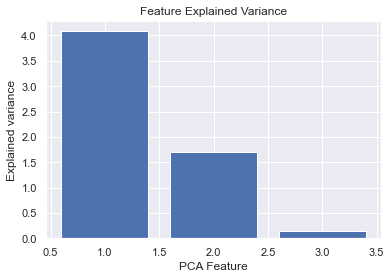

In [20]:
import matplotlib.pyplot as plt 
import seaborn as sns 
 
from sklearn.decomposition import PCA
sns.set()

#reduce to 3 features
pca = PCA(n_components=3)

pca.fit_transform(scaled_data)
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )

plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

#from mpl_toolkits.mplot3d import Axes3D

#fig = plt.figure(figsize=(9,9))
#axes = Axes3D(fig)
#axes.set_title('PCA Representation', size=14)
#axes.set_xlabel('PC1')
#axes.set_ylabel('PC2')
#axes.set_zlabel('PC3')

#axes.scatter(finalDf['principal component 1'],finalDf['principal component 2'],finalDf['principal component 3'],c=finalDf['Class Attruibute'], cmap = 'prism', s=10)

#axes.scatter(finalDfTest['principal component 1'],finalDfTest['principal component 2'],finalDfTest['principal component 3'],c=finalDfTest['Class Attruibute'], cmap = 'prism', s=10)

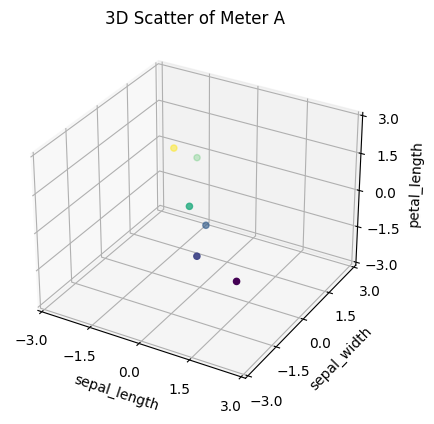

array([-0.1012108 ,  0.57388449,  1.7044069 , -1.03599099, -1.28855944,
        0.14746984])

In [39]:
#Understand the variance visually

import numpy as np
import matplotlib.pyplot as plt
 
from mpl_toolkits import mplot3d
plt.style.use('default')
 
# Prepare 3D graph
fig = plt.figure()
ax = plt.axes(projection='3d')
 
# Plot scaled features
xdata = scaled_data[:,2]
ydata = scaled_data[:,3]
zdata = scaled_data[:,4]
 
# Plot 3D plot
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')
 
# Plot title of graph
plt.title(f'3D Scatter of Meter A')
 
# Plot x, y, z even ticks
ticks = np.linspace(-3, 3, num=5)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_zticks(ticks)
 
# Plot x, y, z labels
ax.set_xlabel('sepal_length', rotation=150)
ax.set_ylabel('sepal_width')
ax.set_zlabel('petal_length', rotation=60)
plt.show()

xdata

In [9]:
#Splitting dataset into Train and Test Sets

X = dataframeA.drop('Class Attruibute',axis=1).values
y = dataframeA['Class Attruibute'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train_pca = scaler.transform(X_train)
X_test_pca = scaler.transform(X_test)


X_train_pca

X_test_pca

array([[ 0.61926421,  0.8744026 ,  0.34689035, -1.07897358, -0.57447519,
        -0.72424464],
       [ 1.26568591, -0.20081479,  0.72770659,  0.49753805, -0.07538331,
         0.51389539],
       [-0.72307164,  1.14405203,  0.8133538 , -0.58293568, -0.35941165,
        -0.76156117],
       [ 0.83949536,  1.44103054,  1.28547229, -1.07556066, -0.32853473,
        -0.78021736],
       [ 0.75394177, -0.42023152, -0.42784716,  0.48829178,  0.17462883,
         0.45925195],
       [-0.55520046,  1.11091466, -1.07068843,  0.446757  ,  0.23341443,
         0.11407127],
       [ 0.91394953, -0.116951  ,  0.44101687,  1.03494881,  1.3513735 ,
         1.10164496],
       [ 0.97183229,  0.69805373, -0.5404972 ,  0.49256077, -0.12922045,
         0.58853251],
       [ 0.26349887,  1.58998431,  0.03569349, -1.0830574 , -0.92113414,
        -0.75356504],
       [ 0.96633885, -0.52023795, -1.52925023,  0.49727396, -0.31207834,
         0.59252848],
       [-1.37568327, -1.38509904,  0.54400579,  0.

In [10]:
%%time

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_pca,y_train)

y_train_hat =logisticRegr.predict(X_train_pca)
train_accuracy = accuracy_score(y_train, y_train_hat)*100
print('"Accuracy for our Training dataset with PCA is: %.4f %%' % train_accuracy)

"Accuracy for our Training dataset with PCA is: 87.9310 %
CPU times: total: 0 ns
Wall time: 5 ms


In [11]:
y_test_hat=logisticRegr.predict(X_test_pca)
test_accuracy=accuracy_score(y_test,y_test_hat)*100
test_accuracy
print("Accuracy for our Testing dataset with PCA is : {:.3f}%".format(test_accuracy) )

Accuracy for our Testing dataset with PCA is : 72.000%


In [12]:
# PCA

#pca = PCA(n_components=6)
#pca.fit(scaled_data)
#scale_data_pca = pca.transform(scaled_data)

#scale_data_pca

# split data table into data X and class labels y

#test = dataframeA.iloc[:,1:6].values
#y = dataframeA.iloc[:,7].values
#y

In [13]:
# Calculate cumulative explained variance across all PCs

#cum_exp_var = []
#var_exp = 0
#for i in pca.explained_variance_ratio_:
    #var_exp += i
    #cum_exp_var.append(var_exp)

# Plot cumulative explained variance for all PCs

#fig, ax = plt.subplots(figsize=(8,6))
#ax.bar(range(1,7), cum_exp_var)
#ax.set_xlabel('# Principal Components')
#ax.set_ylabel('% Cumulative Variance Explained');


In [14]:
#obtain covariance matrix
#features = scaled_data.T
#cov_matrix = np.cov(features)
#cov_matrix[:10]

In [15]:
#eigendecomposition
#returns a tuple, where the first element represents eigenvalues and 
#the second one represents eigenvectors
#values, vectors = np.linalg.eig(cov_matrix)
#values[:10]

In [16]:
#vectors[:10]

In [17]:
#calculate the percentage of explained variance per principal component

#explained_variances = []
#for i in range(len(values)):
    #explained_variances.append(values[i] / np.sum(values))
 
#print(np.sum(explained_variances), '\n', explained_variances)

#first value is just the sum of explained variances and must be equal to 1
#second value is an array: 
#representing the explained variance percentage per principal component

NameError: name 'explained_variances' is not defined

In [ ]:
#projected_1 = scaled_data.dot(vectors.T[0])
#projected_2 = scaled_data.dot(vectors.T[1])
#res = pd.DataFrame(projected_1, columns=['PC1'])
#res['PC2'] = projected_2
#res['Class Attruibute'] = y
#res.head()

In [ ]:
#pca3 = PCA(n_components=3)
#principalComponents = pca3.fit_transform(scaled_data)

#principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

#finalDf = pd.concat([principalDf, df[['Class Attruibute']]], axis = 1)
#finalDf

In [ ]:
#from mpl_toolkits.mplot3d import Axes3D

#fig = plt.figure(figsize=(9,9))
#axes = Axes3D(fig)
#axes.set_title('PCA Representation', size=14)
#axes.set_xlabel('PC1')
#axes.set_ylabel('PC2')
#axes.set_zlabel('PC3')

#axes.scatter(finalDf['principal component 1'],finalDf['principal component 2'],finalDf['principal component 3'],c=finalDf['Class Attruibute'], cmap = 'prism', s=10)